# The General Linear Model

You've probably heard it said before that statistics is mostly linear models. At first, this probably sounds quite arcane! In this session, we'll go through some examples to hopefully convince you that this is true.

## Slides

<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vQxbd7XEmUd9jmtIaHkvscRCc_1lL3XnYsnHIHqiyMITRqhpMta5l9dGJBoSkoAxs1_O-nzuDNdrNnm/embed?start=false&loop=true&delayms=60000" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>

## Try it Out!

Here are some examples you can run interactively, showing that several kinds of model are just variants of the linear models.

In [1]:
options(repr.plot.width=5, repr.plot.height=3)

In [2]:
# load libraries used in the examples
library(tibble)
library(dplyr)
library(ggplot2)

# set the ggplot2 theme
theme_set(theme_classic())

# set a seed for reproducibility
set.seed(1)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### 1. t-tests

In this example, we generate distributions of heights for two groups. Each group has $N=30$ observations.

We've set the group averages to be $\mu_A = 180$ and $\mu_B = 175$, with an equal standard deviation of $\sigma = 6.4$

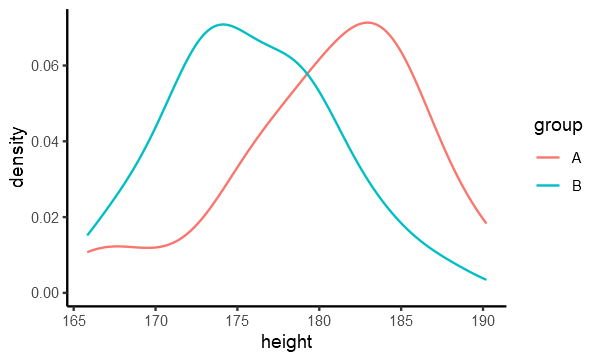

In [3]:
N1 <- 30  # number of observations per group

# generate the two groups
dat1 <- tibble(
    group = rep(c("A", "B"), each=N1),
    height = c(rnorm(N1, 180, 6.4), rnorm(N1, 175, 6.4))
)

dat1 |>
    ggplot(aes(height, colour=group)) +
    geom_density(key_glyph="path")

If we were to perform a *t*-test on these data, we would get *t*(58)=4, *p*<.001

In [4]:
t1 <- t.test(height ~ group, data=dat1, var.equal=TRUE)
t1


	Two Sample t-test

data:  height by group
t = 3.2836, df = 58, p-value = 0.00174
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 1.826236 7.529714
sample estimates:
mean in group A mean in group B 
       180.5277        175.8498 


(side note: we have to set `var.equal=TRUE`, as R will by default use a Welch's *t*-test unless we tell it not to)

Another way of representing the same information would be as a simple linear model (the `lm()` function in R). This gives us the result of a mean difference of $B_1$=-4.68 (*SE*=1.43, *p*<.001). Note that the *t* and *p* values are identical to those in the *t*-test above!

In [5]:
mod1 <- lm(height ~ group, data=dat1)
summary(mod1)


Call:
lm(formula = height ~ group, data = dat1)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7018  -3.4063   0.2985   3.7167  11.8248 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  180.528      1.007 179.206  < 2e-16 ***
groupB        -4.678      1.425  -3.284  0.00174 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.518 on 58 degrees of freedom
Multiple R-squared:  0.1568,	Adjusted R-squared:  0.1422 
F-statistic: 10.78 on 1 and 58 DF,  p-value: 0.00174


### 2. ANOVAs

We can apply the same linear-model logic to ANOVAs.

Here we simulate reading scores for a 2 (age group) x 2 (reading ability group) design.

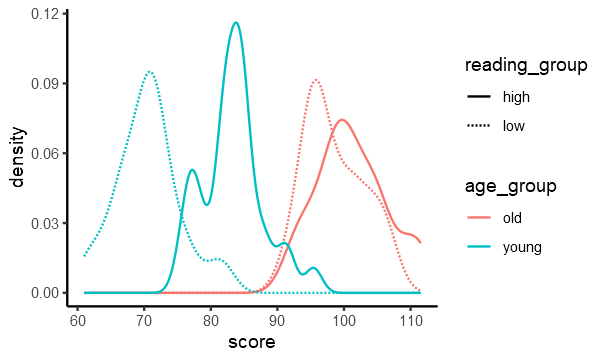

In [6]:
N2 <- 30  # number of observations per group

# generate the two groups
dat2 <- tibble(
    age_group = rep(c("young", "old", "young", "old"), each=N2),
    reading_group = rep(c("low", "low", "high", "high"), each=N2),
    score = c(
        rnorm(N2, 70, 5),
        rnorm(N2, 98, 5),
        rnorm(N2, 85, 5),
        rnorm(N2, 100, 5)
    )
)

dat2 |>
    ggplot(aes(score, colour=age_group, linetype=reading_group)) +
    geom_density(key_glyph="path")

We could analyse this with an ANOVA. We might report the main effects and interaction as:

*There was a main effect of age (F(1, 116)=688.02, p<.001), with scores higher in the old age group than in the young age group. There was also a main effect of reading group, with scores higher in the high reading group (F(1, 116)=77.79, p<.001). Finally, there was an interaction between age group and reading group, where the effect of reading group was smaller in the older age group than in the younger age group (F(1, 116)=33.92, p<.001).*

In [7]:
anova2 <- aov(score ~ age_group * reading_group, data=dat2)
summary(anova2)

                         Df Sum Sq Mean Sq F value   Pr(>F)    
age_group                 1  15767   15767  688.02  < 2e-16 ***
reading_group             1   1783    1783   77.79 1.37e-14 ***
age_group:reading_group   1    777     777   33.92 5.23e-08 ***
Residuals               116   2658      23                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We could represent the same information as a linear model.

**Note:** For comparability to `aov()`, we first use a simple coding scheme, where each variable is centred on 0, with values of -0.5 and 0.5 at each extreme. (See slide 60 onwards for a visualisation of this method). By using this method, we estimate the *main effects* for age, reading group, and the interaction. If we didn't do this step, we would only be estimating simple effects.

In [8]:
# code the categorical variables numerically
dat2 <- dat2 |>
    mutate(
        age_num = ifelse(age_group=="old", -0.5, 0.5),
        reading_num = ifelse(reading_group=="low", -0.5, 0.5)
    )

mod2 <- lm(score ~ age_num * reading_num, data=dat2)
summary(mod2)


Call:
lm(formula = score ~ age_num * reading_num, data = dat2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5762 -3.3081 -0.3837  2.7892 12.0860 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           88.413      0.437 202.318  < 2e-16 ***
age_num              -22.925      0.874 -26.230  < 2e-16 ***
reading_num            7.708      0.874   8.820 1.37e-14 ***
age_num:reading_num   10.180      1.748   5.824 5.23e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.787 on 116 degrees of freedom
Multiple R-squared:  0.8733,	Adjusted R-squared:   0.87 
F-statistic: 266.6 on 3 and 116 DF,  p-value: < 2.2e-16


Note that, again, get the same *p* values. Rather than *F* values, we get *t* values. However, we can easily calculate the *F* values as $F=t^2$. For example, we can calculate the *F* value for the effect of reading group as...

In [9]:
8.820 ** 2

[1] 77.7924

### 3. Test your Understanding!

**Possibly tricky:** Try to calculate the simple effect of age in the high and low reading groups separately. Slides 60-65 may help you.

In [10]:
# your code here...